In [ ]:
#!pip install tensorflow
#!pip install keras

In [2]:
import numpy as np

#dataset
from sklearn.datasets import make_circles

# graficar
import matplotlib.pyplot as plt

# modelado
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [3]:
def plot_data(pl,X,y):
    pl.plot(X[y==0,0],X[y==0,1], 'ob',alpha=0.5)
    pl.plot(X[y==1,0],X[y==1,1], 'xr',alpha=0.5)
    pl.legend(['0','1'])
    return pl

def plot_decision_boundary(model,X,y):
    amin,bmin=X.min(axis=0)-0.1
    amax,bmax=X.max(axis=0)+0.1
    hticks = np.linspace(amin,amax,101)
    vticks = np.linspace(bmin,bmax,101)
    
    aa,bb = np.meshgrid(hticks,vticks)
    ab = np.c_[aa.ravel(),bb.ravel()]
    
    c=model.predict(ab)
    Z=c.reshape(aa.shape)
    
    plt.figure(figsize=(13,10))
    plt.contourf(aa,bb,Z,cmap='bwr',alpha=0.2)
    plot_data(plt,X,y)
    return plt

Ejemplo de implementación de una red neuronal artificial para resolver un problema no linealmente separable. 

Utilizaremos la función make_circles de sklearn para simular nuestro conjunto de datos. Esta función nos generará un conjunto de datos que, al graficarlos, forman dos círculos concéntricos. 

El círculo del centro corresponde a ejemplos de la clase A, mientras que el círculo de afuera corresponde a ejemplos de la clase B.

# Creación del dataset

In [32]:
X, y = make_circles(n_samples = 1000, factor = 0.5, noise = 0.1, random_state = 42)

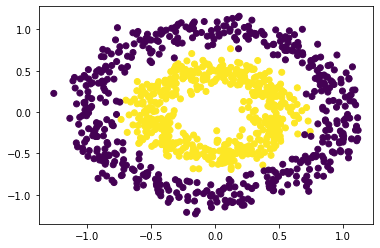

In [33]:
x1 = X[:, 0].flatten()
x2 = X[:, 1].flatten()

plt.scatter(x1, x2, c = y) # c es el color
plt.show()

# Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Creación del modelo

Utilizaremos el modelo Sequential para crear nuestra red neuronal. Dicha red, consta solamente de dos capas de 8 neuronas con función de activación relu mientras que la última capa tendrá una sola neurona con función de activación sigmoide

In [36]:
# definimos la arquitectura de la red
model = models.Sequential()

# agrego una capa con 8 neuronas de salida, parametro para las de entrada input_shape
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu')) # tiene 8 de entrada
model.add(layers.Dense(1, activation = 'sigmoid')) # salida

Utilizaremos el optimizador adam, con la función de perdida binary_crossentropy puesto que nuestro problema de clasificación consta solamente de dos clases. También utilizaremos accuracy como métrica del modelo.

In [37]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

Entrenaremos al modelo durante 100 épocas utilizando un tamaño de batch de 32

In [38]:
model.fit(
        x = X_train,
        y = y_train,
        batch_size = 32, # porcion de ejemplos que se procesan en cada iteracion
        epochs = 100,
        validation_data = (X_test, y_test),
        #verbose = False
)

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7007 - accuracy: 0.4737 - val_loss: 0.6984 - val_accuracy: 0.4650
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5038 - val_loss: 0.6948 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4975 - val_loss: 0.6913 - val_accuracy: 0.5150
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.4963 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5650 - val_loss: 0.6832 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6388 - val_loss: 0.6786 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6712 - val_loss: 0.6742 - val_accuracy: 0.6250
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9975 - val_loss: 0.0982 - val_accuracy: 0.9750
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9950 - val_loss: 0.0963 - val_accuracy: 0.9750
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9962 - val_loss: 0.0951 - val_accuracy: 0.9750
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9950 - val_loss: 0.0924 - val_accuracy: 0.9750
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9962 - val_loss: 0.0912 - val_accuracy: 0.9750
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9962 - val_loss: 0.0900 - val_accuracy: 0.9750
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9962 - val_loss: 0.0886 - val_accuracy: 0.9750
Epoch 

## Curvas de aprendizaje del modelo

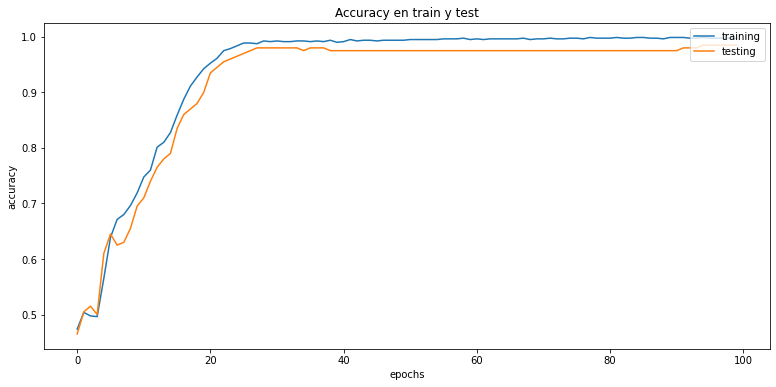

In [39]:
plt.figure(figsize=(13,6))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Accuracy en train y test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training','testing'], loc='upper right')
plt.show()

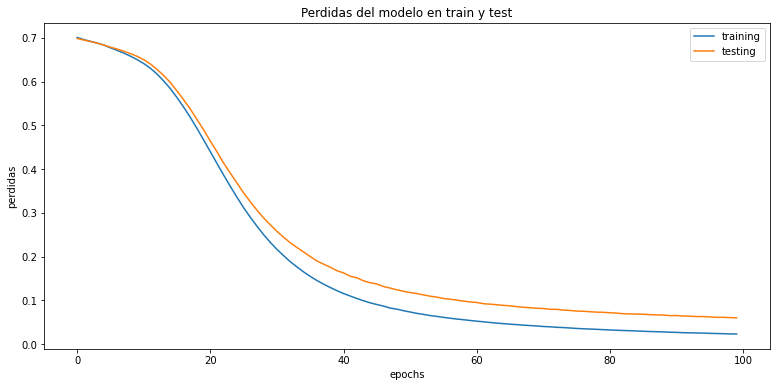

In [40]:
plt.figure(figsize=(13,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Perdidas del modelo en train y test')
plt.xlabel('epochs')
plt.ylabel('perdidas')
plt.legend(['training','testing'], loc='upper right')
plt.show()

## Métricas

In [41]:
resultado = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 917us/step - loss: 0.0601 - accuracy: 0.9850


In [43]:
print("Test loss", resultado[0])

Test loss 0.06006564944982529


In [44]:
print("Test accuracy", resultado[1])

Test accuracy 0.9850000143051147


319/319 [==============================] - 0s 547us/step


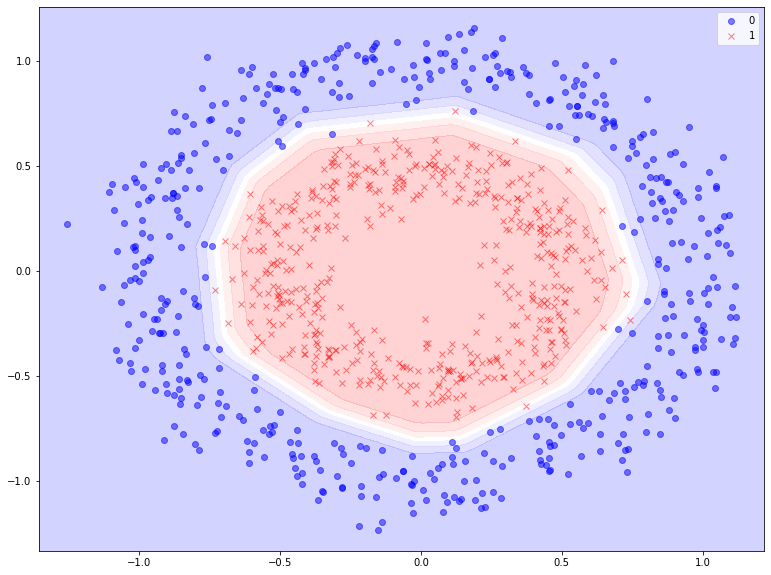

In [45]:
plot_decision_boundary(model, X, y).show()